# Different latent dimensions

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

import specvae.utils as utils
from specvae.utils import filter_score_matrix
import specvae.dataset as dt
from specvae.visualize import plot_distribution, plot_precentile
from specvae.dataset import MoNA

In [2]:
dataset = 'MoNA'

In [3]:
jaccard_scores = np.load(utils.get_project_path() / '.data' / dataset / ('%s_sim_jaccard.npy' % dataset), allow_pickle=True)

eu_files = [
    '%s_vaesim_eu.npz' % dataset,
]
kl_files = [
    '%s_vaesim_kl.npz' % dataset,
]
# cs_files = [
#     '%s_vaesim_cs.npz' % dataset,
# ]
eu_model_names = [
    'eu_alt_specvae_4000-3076-50-3076-4000', 
]
kl_model_names = [
    'kl_alt_specvae_4000-3076-50-3076-4000', 
]
# cs_model_names = [
#     'cs_alt_specvae_4000-2000-10-2000-4000', 
# ]
eu_data = []
for file in eu_files:
    vs = np.load(utils.get_project_path() / '.data' / dataset / file, allow_pickle=True)
    eu_data.append(vs['vae_eu'])
kl_data = []
for file in kl_files:
    vs = np.load(utils.get_project_path() / '.data' / dataset / file, allow_pickle=True)
    kl_data.append(vs['vae_kl'])
# cs_data = []
# for file in cs_files:
#     vs = np.load(utils.get_project_path() / '.data' / dataset / file, allow_pickle=True)
#     cs_data.append(vs['vae_cs'])

In [4]:
cs = np.load(utils.get_project_path() / '.data' / dataset / ('%s_cossim.npz' % dataset), allow_pickle=True)
cos_sim, cos_match = cs['sim'], cs['match']
spec2vec_scores = np.load(utils.get_project_path() / '.data' / dataset / ('%s_spec2vec.npz' % dataset), allow_pickle=True)
s2v_sim = spec2vec_scores['sim']

In [5]:
ignore_diagonal = False
num_bins = 100
show_top_percentile=0.1

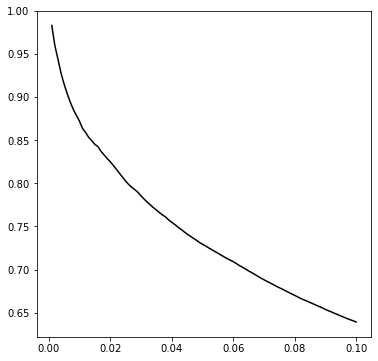

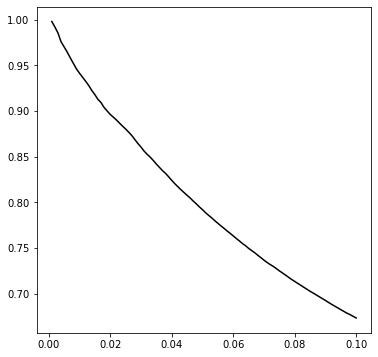

In [6]:
cos_per = plot_precentile(jaccard_scores, cos_sim, num_bins=num_bins, 
    show_top_percentile=0.1, ignore_diagonal=True)
s2v_per = plot_precentile(jaccard_scores, s2v_sim, num_bins=num_bins, 
    show_top_percentile=0.1, ignore_diagonal=True)

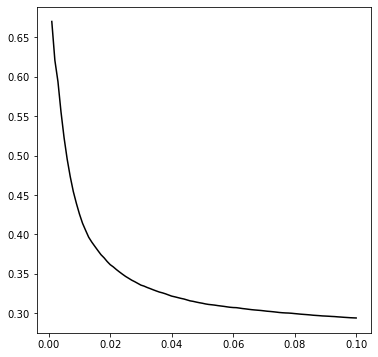

In [7]:
eu_per = []
for sim in eu_data:
    for s in sim:
        eu_per.append(plot_precentile(jaccard_scores, s, num_bins=num_bins, 
                show_top_percentile=0.1, ignore_diagonal=True))

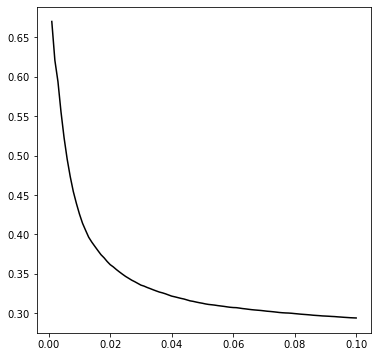

In [8]:
kl_per = []
for sim in kl_data:
    for s in sim:
        kl_per.append(plot_precentile(jaccard_scores, s, num_bins=num_bins, 
                show_top_percentile=0.1, ignore_diagonal=True))

In [9]:
# cs_per = []
# for sim in cs_data:
#     for s in sim:
#         cs_per.append(plot_precentile(jaccard_scores, s, num_bins=num_bins, 
#                 show_top_percentile=0.1, ignore_diagonal=True))

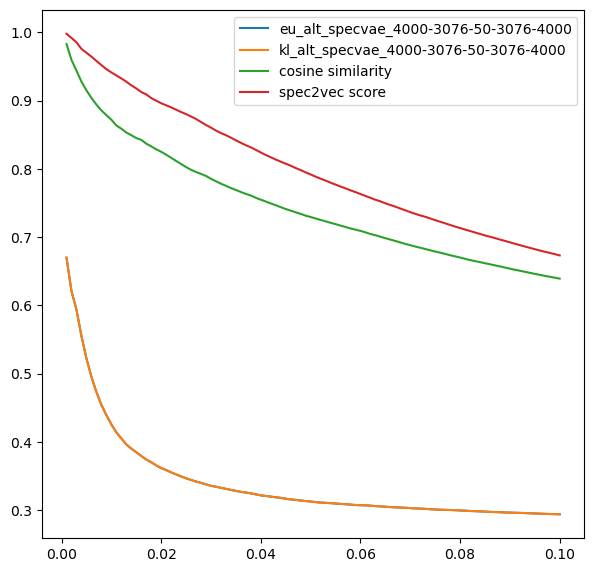

In [10]:
fig, ax = plt.subplots(figsize=(7,7), dpi=100)
x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]
for i, per in enumerate(eu_per):
    plt.plot(x_percentiles, per, label=eu_model_names[i])
for i, per in enumerate(kl_per):
    plt.plot(x_percentiles, per, label=kl_model_names[i])
# for i, per in enumerate(cs_per):
#     plt.plot(x_percentiles, per, label=cs_model_names[i])
plt.plot(x_percentiles, cos_per, label='cosine similarity')
plt.plot(x_percentiles, s2v_per, label='spec2vec score')
plt.legend()
plt.show()